In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns',1000)

In [5]:
# load the dataset
df=pd.read_csv(r"sample_data\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Summary of the dataset

In [8]:
print("Number of rows:",df.shape[0])

Number of rows: 119390


In [9]:
print("Number of columns:",df.shape[1])

Number of columns: 32


In [10]:
print("Data types\n:",df.dtypes)

Data types
: hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

In [11]:
print("missing values:\n",df.isnull().sum())

missing values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [ ]:
# from the summary of the datset we can see that there are 32 columns in the dataset where is_cancelled is the dependent 
# feature and remaining are the independent features.
# We can also see that some of the features have object datatype rather than int or float so we will convert the datatype of 
# features where it required.
# We can see that there are missing values in some features like children,country,agent,company we will handle them mode 
# and mean or median of respective feature 

### Handling Missing values

In [12]:
#lets see the missing value percentage for each feature
missing_data = df.isna().sum()
missing_percentage = round((missing_data / len(df)) * 100, 2)
missing_info = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_info)

                                Missing Count  Missing Percentage
hotel                                       0                0.00
is_canceled                                 0                0.00
lead_time                                   0                0.00
arrival_date_year                           0                0.00
arrival_date_month                          0                0.00
arrival_date_week_number                    0                0.00
arrival_date_day_of_month                   0                0.00
stays_in_weekend_nights                     0                0.00
stays_in_week_nights                        0                0.00
adults                                      0                0.00
children                                    4                0.00
babies                                      0                0.00
meal                                        0                0.00
country                                   488                0.41
market_seg

In [ ]:
# We can see that four columns contain missing values 1)children 2)country 3)agent 4)company

# The company column has 112593 missing values with 94.31% data absent, due to this high missing rate we will drop this column

# we will also drop agent column which have id of the travel agency and it also have 13.69% missing rate

In [13]:
df.drop('company',inplace=True,axis=1)

In [22]:
df.drop('agent',inplace=True,axis=1)

In [ ]:
# we will also drop the feature reservation_status because it indicates the final outcome of the booking,which is known only 
# after the cancellation is determined. Including this feature can lead to data leakage, compromising the model's ability 
# to generalize to new bookings.

In [33]:
df.drop('reservation_status',inplace=True,axis=1)

In [27]:
# we will have handle the missing values of column children and country by using the mode of respective column as its 
# datatype is object

In [28]:
df['children'].fillna(df['children'].mode()[0],inplace=True)

In [29]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [31]:
df.isna().sum().sum()

0

In [ ]:
# now there is no missing value in our dataset

### Converting datatype 

In [35]:
# converting the datatype of feature reservation_status_date to datetime from object
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Feature Engineering

In [ ]:
# Coverting arrival_date_month feature into number according to the number of each month

In [36]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

In [ ]:
# lets create some new features like total_stays and total_guests using some existing features

In [37]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [38]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

#### Lets see the descriptive stastistic for numerical features

In [39]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_month,119390.0,6.552483,3.090619,1.00,4.00,7.000,9.0,12.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0


In [ ]:
# The decriptive statistic provide an overview of the numerical features.we can get some insights like below
# 1)cancellation behavior:around 37% customer canceled their reservation,suggesting a notable cancellation rate.
# 2)Lead time: Customers, on average, book reservations 104 days in advance, with a maximum lead time of 737 days. 
# This indicates a tendency for customers to plan well ahead.
# Arrival patterns: Most guests arrived in the year 2016, particularly during the 27th week
# Booking changes: On average,customers make slight modifications to their reservations, with an average of 0.22 booking changes.
# Special requests: The majority of customers (57%) made at least one special request during their stay.
# we can see that customer average stay days are 3.43

#### lets check the unique values for all categorical columns

In [46]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print("*"* 100)

hotel
['Resort Hotel' 'City Hotel']
****************************************************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
****************************************************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL

### Exploratory Data Analysis

In [40]:
#checking the cancellation percentage
df.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

<Axes: ylabel='is_canceled'>

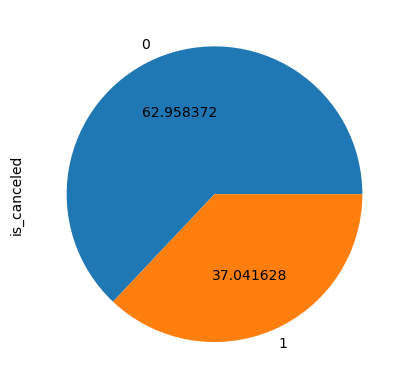

In [41]:
df.is_canceled.value_counts(normalize=True).plot(kind='pie',autopct='%2f')

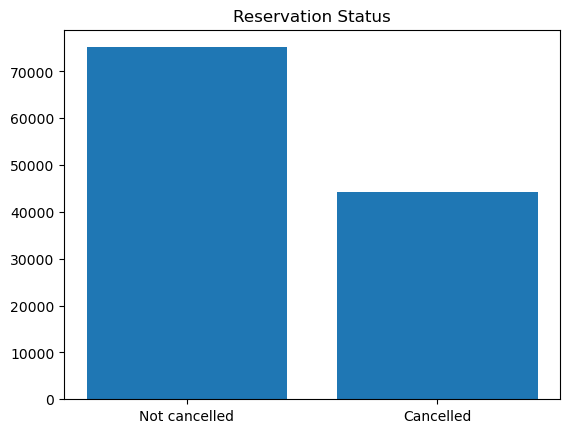

In [42]:
#By using bar graph
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts())
plt.show()

In [ ]:
# The target variable is_canceled,represents the cancellation status of reservation.The dataset contains 75,166 instances(62.96%)
# where reservations were not canceled(coded as 0) and 44,224 instances (37.04%) where reservations were canceled(coded as 1).
# since it looks like a balanced distribution between cancelled and not cancelled there may be no need to employing techniques
# like class imbalance

In [44]:
# lets see the cancellation rate for both resort and city hotels

Total Cancellations Rate
0    62.958372
1    37.041628
Name: is_canceled, dtype: float64
Total Cancellations Rate for Resort Hotel
0    72.236645
1    27.763355
Name: is_canceled, dtype: float64
Total Cancellations Rate for City Hotel
0    58.273037
1    41.726963
Name: is_canceled, dtype: float64


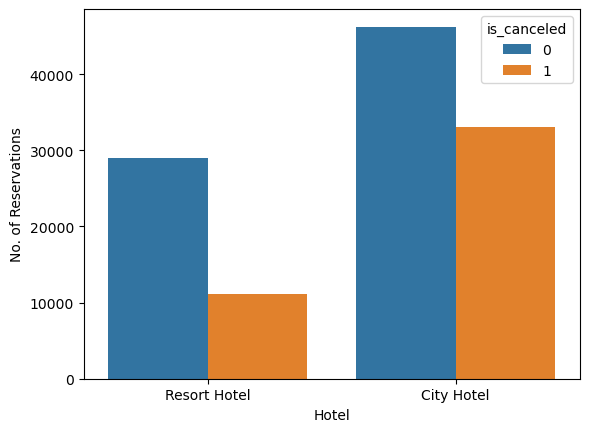

In [47]:
cancel_perc = df['is_canceled'].value_counts(normalize=True)*100
print('Total Cancellations Rate')
print(cancel_perc)

df_resort = df[df['hotel'] == 'Resort Hotel']
cancel_perc_resort = df_resort['is_canceled'].value_counts(normalize = True)*100
print('Total Cancellations Rate for Resort Hotel')
print(cancel_perc_resort)

df_city = df[df['hotel'] == 'City Hotel']
cancel_perc_city = df_city['is_canceled'].value_counts(normalize = True)*100
print('Total Cancellations Rate for City Hotel')
print(cancel_perc_city)

sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.xlabel('Hotel')
plt.ylabel('No. of Reservations')
plt.show()

In [48]:
#The overall cancellation rate is around 37%. Although City Hotel is more popular and receive more bookings, 
#the cancellation rate is twice of the Resort Hotel.

### Lead time

In [ ]:
# lets see the relation between lead time and cancelltion rate

In [49]:
df['lead_time'].value_counts(normalize=True)

0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
         ...   
400    0.000008
370    0.000008
532    0.000008
371    0.000008
463    0.000008
Name: lead_time, Length: 479, dtype: float64

In [50]:
# we can see that top 3 frequent lead time is 0,1,2 days

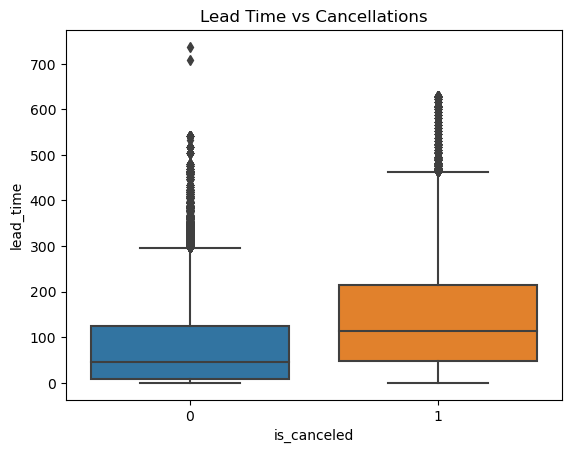

In [51]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellations')
plt.show()

[Text(0.5, 0, 'Not canceled/ Canceled'), Text(0, 0.5, 'Lead Time (day)')]

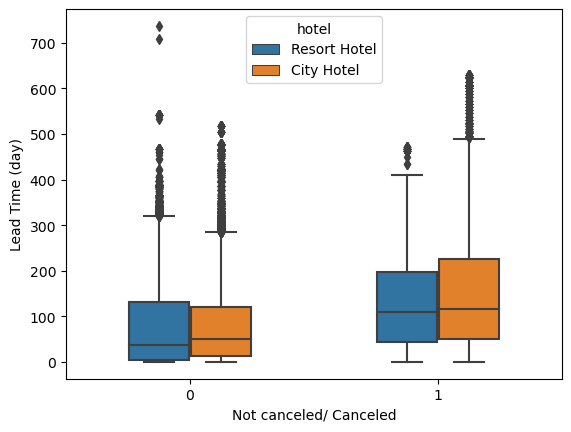

In [52]:
fig1 = sns.boxplot(data = df, y='lead_time', x='is_canceled', hue='hotel', 
                   width=.5)
fig1.set(xlabel='Not canceled/ Canceled', ylabel='Lead Time (day)')

In [ ]:
# we can see that customer with longer lead time is more likely to cancel the booking this can be the factor that affecting
# the cancellation

### adr

In [ ]:
# from the descriptive statisctic of numerical feature we can see that their may be some extram outliers in the feature adr
# lets treat them

<Axes: >

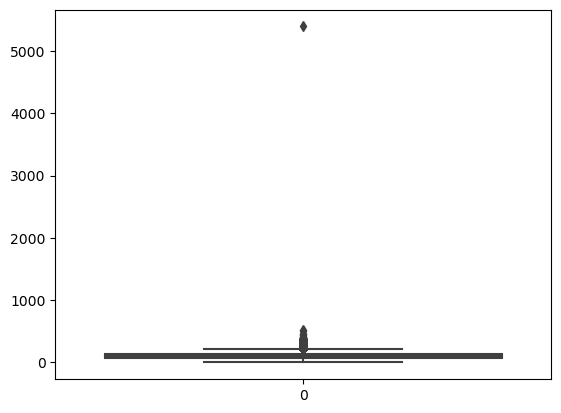

In [53]:
sns.boxplot(df['adr'])

<Axes: xlabel='adr', ylabel='Density'>

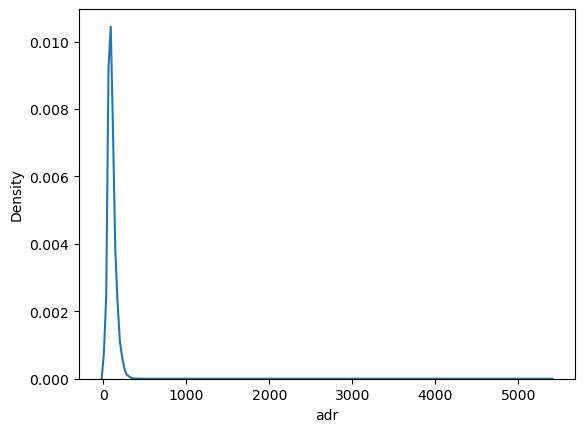

In [54]:
sns.kdeplot(df['adr'])

In [ ]:
# we can see there are some extream ouliers in this feature we will handle them using IQR method

In [55]:
def outliers(i):
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[i]=np.where(df[i]>upper,upper,df[i])
outliers('adr')

<Axes: >

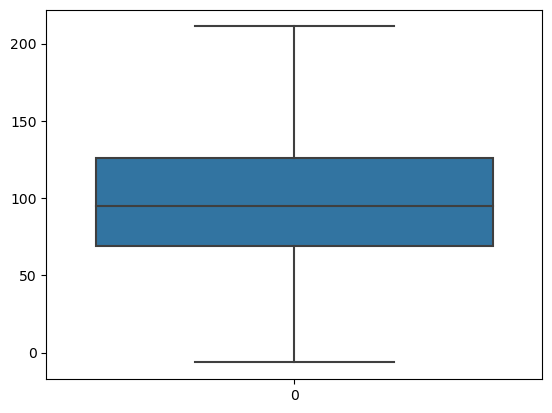

In [57]:
# After handling outliers
sns.boxplot(df['adr'])

### Seasonality in bookings

In [ ]:
# Reservation status with respect to months

In [ ]:
#extract month from reservation status date
import datetime as dt
df['month'] = df['reservation_status_date'].dt.month

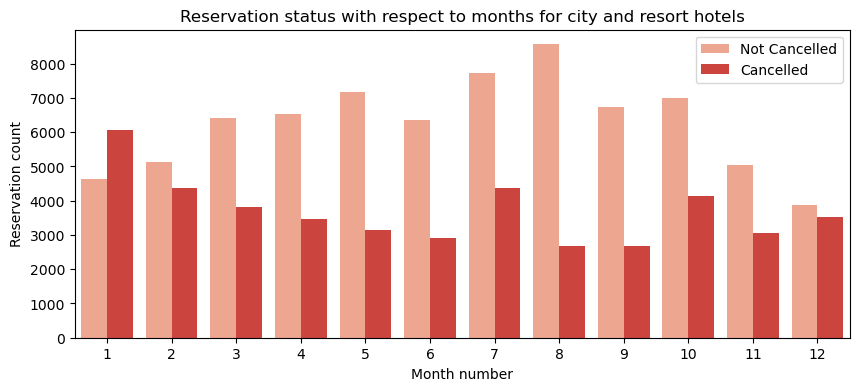

In [69]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'month', hue = 'is_canceled', palette = 'Reds')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status with respect to months for city and resort hotels')
plt.ylabel('Reservation count')
plt.xlabel('Month number')
plt.show()

In [ ]:
# We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status. 
# It's evident that the month of August stands out, having the highest numbers of both confirmed and canceled reservations. 
# In contrast, January has the fewest confirmed reservations but the highest number of canceled reservations.

In [ ]:
# Suggetion:
# During the month of January, hotels can launch marketing campaigns with attractive offers to boost their revenue, 
# especially since cancellations tend to peak during this period.

### Distribution of stays accross different hoels

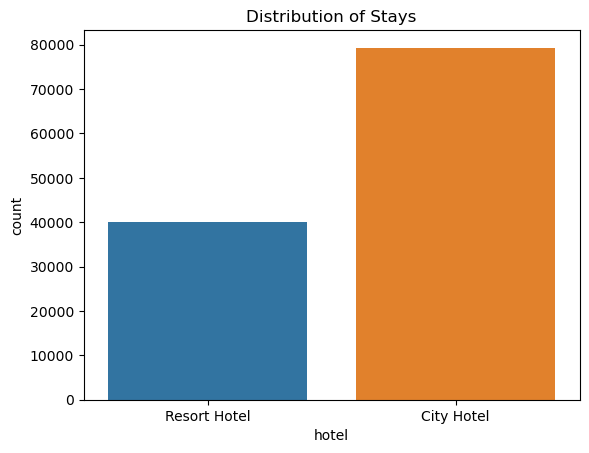

In [59]:
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Stays')
plt.show()

In [ ]:
# we can see that city hotels has much more stays than resort.

### Average daily rate of city and resort hotels

In [61]:
resort = df_resort.groupby('reservation_status_date')[['adr']].mean().reset_index()
city = df_city.groupby('reservation_status_date')[['adr']].mean().reset_index()

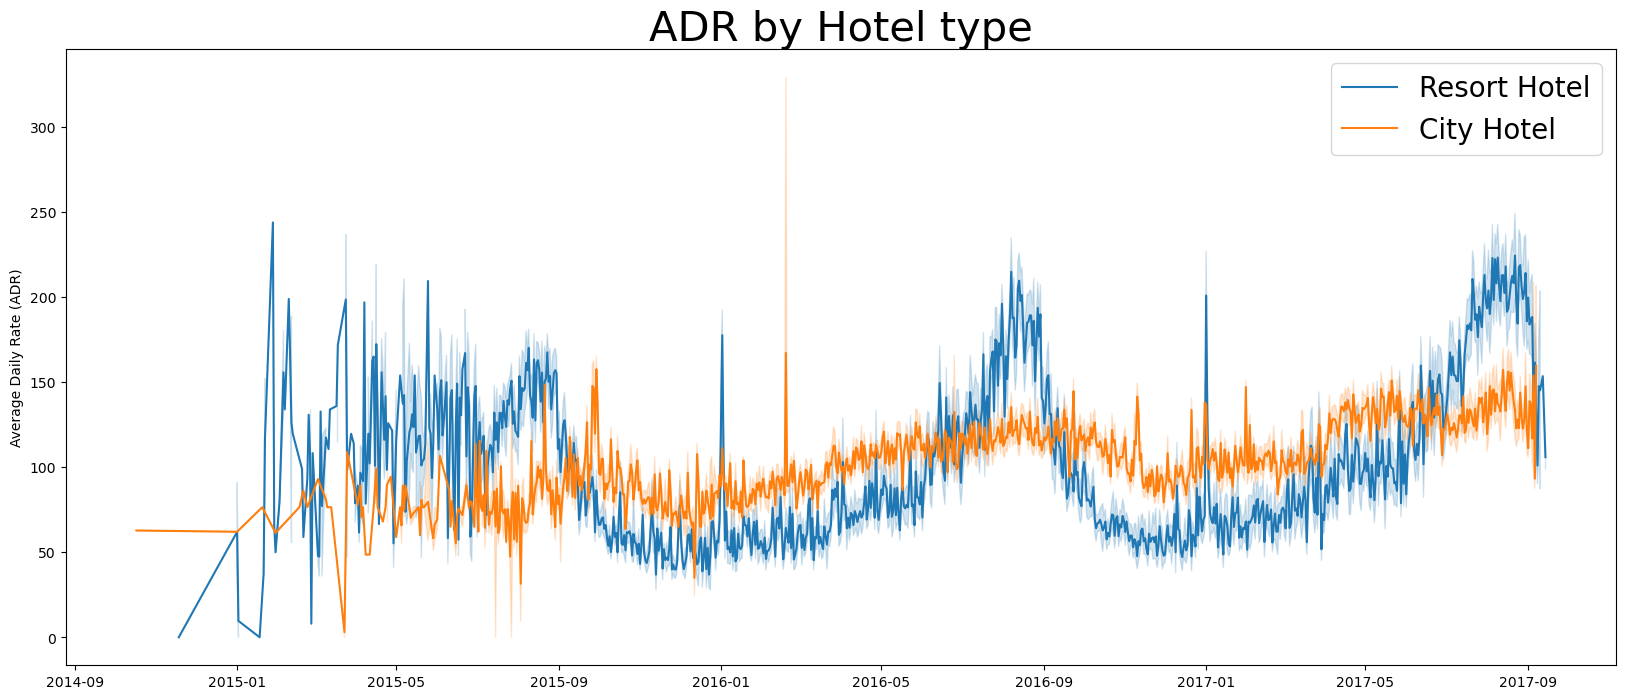

In [63]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = df_resort, x = 'reservation_status_date', y = 'adr', label = 'Resort Hotel')
sns.lineplot(data = df_city, x = 'reservation_status_date', y = 'adr', label = 'City Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xlabel('')
plt.title('ADR by Hotel type', fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# ADR of Resort hotels is much higher than City Hotels in some periods.
# High prices might be cause for cancellations for Resorts.

In [ ]:
# suggestions:
# Increasing prices are associated with a higher rate of cancellations. To mitigate reservation cancellations, 
# hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts to 
# customers.
# The resort hotel experiences a higher ratio of cancellations compared to the city hotels. Therefore, hotels should 
# consider offering competitive room price discounts on weekends and holidays.

### Average daily rate per month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


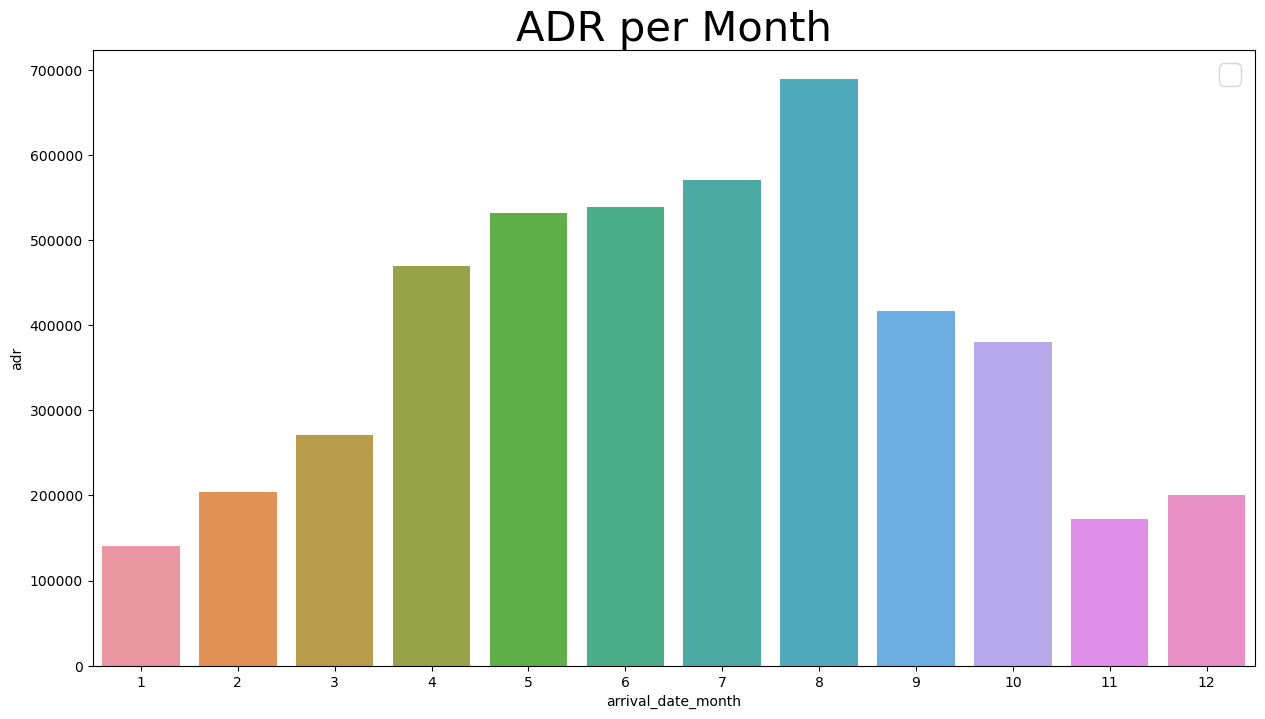

In [70]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month', fontsize = 30)
data = df[df['is_canceled'] == 1].groupby('arrival_date_month')['adr'].sum().reset_index()
sns.barplot(x='arrival_date_month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# This bar graph illustrates that cancellations are most frequent when prices are at their highest and least common when 
# prices are at their lowest. Consequently, the price of accommodation appears to be the primary factor influencing cancellations.

### Heatmap correlations

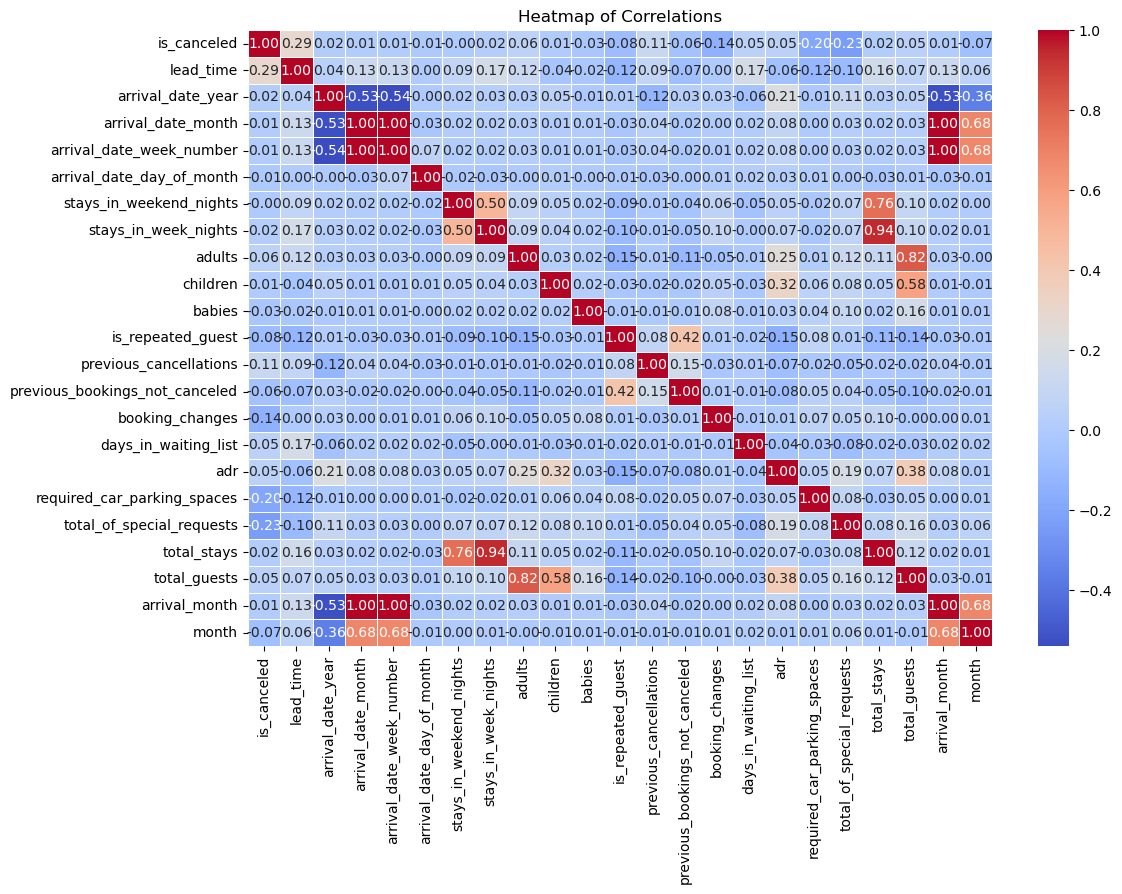

In [71]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

### correlation of every independent feature with dependent feature

In [72]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['is_canceled'].sort_values(ascending=False)

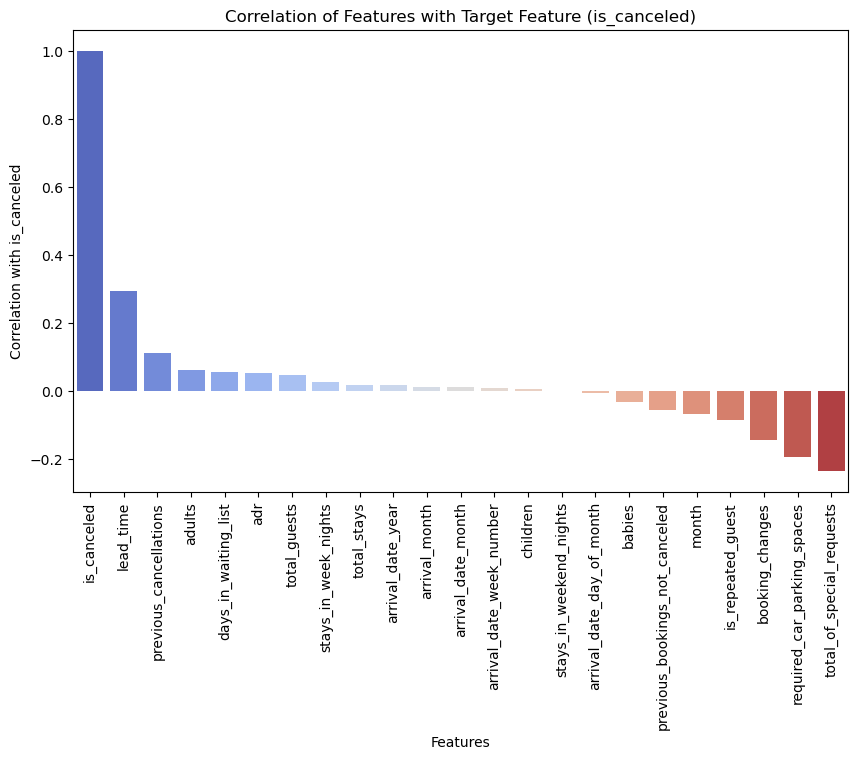

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.title('Correlation of Features with Target Feature (is_canceled)')
plt.xlabel('Features')
plt.ylabel('Correlation with is_canceled')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# lead_time has the greatest positive correlation with is_canceled (r = 0.2931), 
# suggesting that reservations with longer lead times are more likely to be canceled. Next, total_of_special_requests and 
# required_car_parking_spaces exhibit negative correlations (r = -0.2347 and -0.1955, respectively), indicating that 
# reservations with more special requests and those requiring more parking lots are less likely to be canceled.
# is_canceled has mild negative correlation with total_of_special_requests, meaning more requests lead to fewer cancellations.

### Lets see the distribution of some other features

In [75]:
# Distribution of market segments
df['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [ ]:
# we can see that 47% booking from online medium
# Suggetions:
# Provide accurate photos of hotel to reduce cancellations.
# Utilize a reliable online booking platform that allows guests to make reservations easily. 
# Provide high-quality photos and detailed descriptions of properties.
# Stay competitive with your pricing while maintaining the quality of the services. 
# Offer promotions, discounts, and loyalty programs to attract repeat customers.

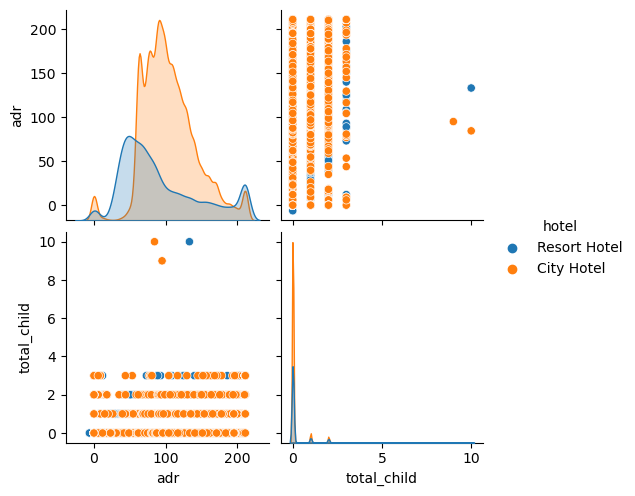

In [76]:
df['total_child'] = df['children'] + df['babies']
sns.pairplot(data = df[df['adr']<500][['hotel','adr', 'total_child']], hue='hotel')
plt.show()

In [ ]:
# In the above graph we can see that:
# Families with kids prefer city hotels over resorts.
# Tourists without kids prefer resorts. This may include group of friends, couples, solo travellers.

In [ ]:
# Suggestions:
# To enhance the resort hotel experience for a target demographic of adult tourists without children, 
# a strategic approach can be adopted to create a more couple-friendly and friends-friendly environment, 
# catering to the preferences and needs of this specific market segment.

### lets see the realtion between room_type and cancellation

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


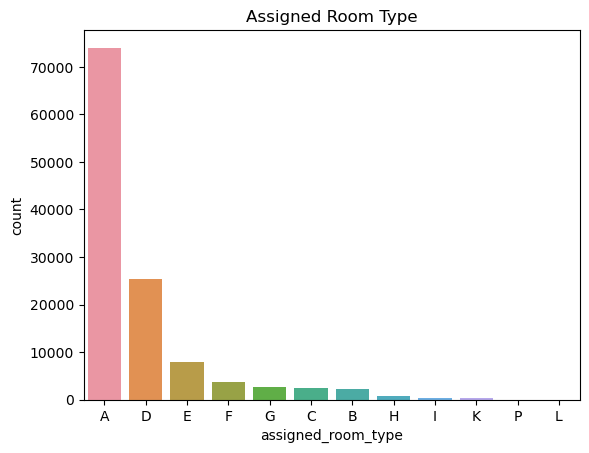

In [137]:
room_list = df['assigned_room_type'].unique()
print(room_list)
sns.countplot(data=df, x='assigned_room_type', 
                     order = df['assigned_room_type'].value_counts().index).set_title('Assigned Room Type')
plt.show()

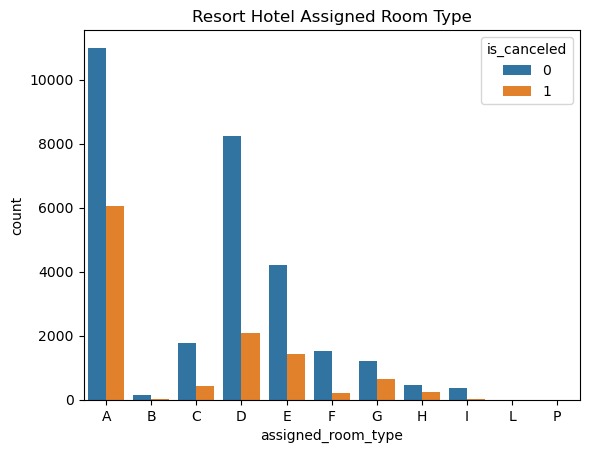

In [138]:
sns.countplot(data=df.loc[df['hotel'] == 'Resort Hotel'].sort_values('assigned_room_type'), 
                     x='assigned_room_type', hue='is_canceled').set_title('Resort Hotel Assigned Room Type')
plt.show()

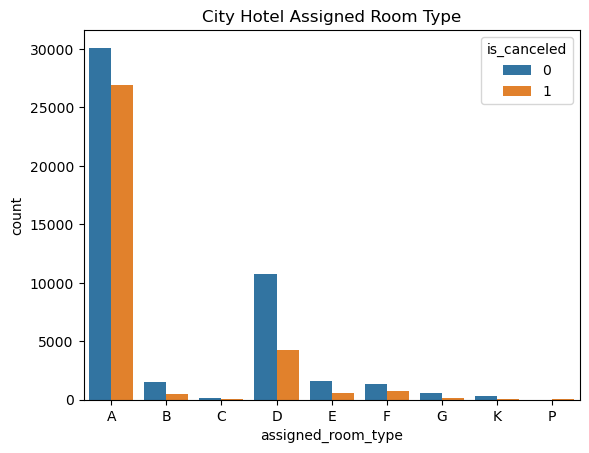

In [139]:
fig2 = sns.countplot(data=df.loc[df['hotel'] == 'City Hotel'].sort_values('assigned_room_type'), 
                     x='assigned_room_type', hue='is_canceled').set_title('City Hotel Assigned Room Type')
plt.show()

In [ ]:
# As we can see that, Room A is the top checked-in room type for both Resort and City Hotel.The most assigned room type, 
# Room A in City Hotel has a high cancellation rate

### Hypothesis testing

In [ ]:
# 1)Customers booking more than 6 months in advance are more likely to cancel
# we're comparing proportions between two groups, we can use a Chi-Square test for independence.

In [77]:
import scipy.stats as stats
df['long_lead_time'] = df['lead_time'] > 180
data = pd.crosstab(df['long_lead_time'], df['is_canceled'])
chi2, p, _, _ = stats.chi2_contingency(data)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference in cancellation rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in cancellation rates.")

Chi-Square Statistic: 5321.73290110073
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in cancellation rates.


In [ ]:
# so we can see that lead time feature affecting the cancellation of booking  as the customer with more lead time is more 
# likely to cancel the booking.

### Model building

### Lets take some necessary features to build the model

In [82]:
#Necessary features to build the model
features = ['is_canceled','lead_time', 'total_stays', 'total_guests', 'adr', 'is_repeated_guest', 
            'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
            'required_car_parking_spaces', 'total_of_special_requests','arrival_date_month',"previous_bookings_not_canceled"]
df2=df[features]

In [83]:
df2

,is_canceled,lead_time,total_stays,total_guests,adr,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,arrival_date_month,previous_bookings_not_canceled
0,0,342,0,2.0,0.000,0,0,3,0,0,0,7,0
1,0,737,0,2.0,0.000,0,0,4,0,0,0,7,0
2,0,7,1,1.0,75.000,0,0,0,0,0,0,7,0
3,0,13,1,1.0,75.000,0,0,0,0,0,0,7,0
4,0,14,2,2.0,98.000,0,0,0,0,0,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,7,2.0,96.140,0,0,0,0,0,0,8,0
119386,0,102,7,3.0,211.065,0,0,0,0,0,2,8,0
119387,0,34,7,2.0,157.710,0,0,0,0,0,4,8,0
119388,0,109,7,2.0,104.400,0,0,0,0,0,0,8,0


### Train Test Split

In [84]:
x = df2.drop('is_canceled',axis=1)
y = df2['is_canceled']

In [85]:
x.shape

(119390, 12)

In [86]:
y.shape

(119390,)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

### 1)Logistic regression

### Model instantiation

In [99]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [110]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('**'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix: \n', cnf_matrix)
    print('**'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('**'*20)
    
y_pred_train = evaluation('Train Data Evaluation',log_clf, x_train, y_train)      

**************Train Data Evaluation***************
Accuracy Score : 0.7335936845631963
****************************************
Confusion Matrix: 
 [[52930  7203]
 [18242 17137]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.88      0.81     60133
           1       0.70      0.48      0.57     35379

    accuracy                           0.73     95512
   macro avg       0.72      0.68      0.69     95512
weighted avg       0.73      0.73      0.72     95512

****************************************


In [111]:
y_pred = evaluation('Test Data Evaluation',log_clf, x_test, y_test)  

***************Test Data Evaluation***************
Accuracy Score : 0.7370801574671245
****************************************
Confusion Matrix: 
 [[13330  1703]
 [ 4575  4270]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     15033
           1       0.71      0.48      0.58      8845

    accuracy                           0.74     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.73      0.74      0.72     23878

****************************************


In [ ]:
# Here we can see on logistic regression we got same accuracy on training and testing data which is 74%.
# we can also try some other tree based models to get better accuracy.
# or we can try some feature selection techniques

### 2)Random forest

In [101]:
rf_clf = RandomForestClassifier(n_estimators=30,random_state=11, n_jobs=-1, oob_score=True)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=11)

In [112]:
evaluation('Train Data Evaluation', rf_clf, x_train, y_train)
print('**'*20)
evaluation('Test Data Evaluation', rf_clf, x_test, y_test)

**************Train Data Evaluation***************
Accuracy Score : 0.9852583968506575
****************************************
Confusion Matrix: 
 [[59600   533]
 [  875 34504]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     60133
           1       0.98      0.98      0.98     35379

    accuracy                           0.99     95512
   macro avg       0.99      0.98      0.98     95512
weighted avg       0.99      0.99      0.99     95512

****************************************
****************************************
***************Test Data Evaluation***************
Accuracy Score : 0.8406482955021358
****************************************
Confusion Matrix: 
 [[13694  1339]
 [ 2466  6379]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88 

In [113]:
rf_clf.oob_score_

0.8309636485467795

In [ ]:
Here we can see that after using random forest we got overfitted model where accuracy on training data is 98% and on testing 
data it is 84% we can try hyperparameter tunning to improve the performance of model

### Hyperparameter Tunning

In [105]:
rf_model = RandomForestClassifier(random_state=11, oob_score=True, n_jobs=-1)

hyp = {'n_estimators': np.arange(15,120,5),
      'criterion':['gini','entropy'],
      'max_depth':np.arange(3,10),
      'min_samples_split':np.arange(3,15),
      'min_samples_leaf':np.arange(3,8),
      'max_samples':np.arange(0.7,0.9,0.05)}

rscv_rf_model = RandomizedSearchCV(rf_model, hyp, cv=3, n_jobs=-1, n_iter=100)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=5, min_samples_split=6,
                       n_estimators=115, n_jobs=-1, oob_score=True,
                       random_state=11)

In [106]:
rscv_rf_model.best_params_

{'n_estimators': 115,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_samples': 0.75,
 'max_depth': 9,
 'criterion': 'entropy'}

In [107]:
rf_clf_hyp = RandomForestClassifier(max_depth=9, max_samples=0.75, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=115, n_jobs=-1,
                       oob_score=True, random_state=11)
rf_clf_hyp.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_samples=0.75, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=115, n_jobs=-1,
                       oob_score=True, random_state=11)

In [114]:
evaluation('Train Data Evaluation', rf_clf_hyp, x_train, y_train)
print('**'*20)
evaluation('Test Data Evaluation', rf_clf_hyp, x_test, y_test)

**************Train Data Evaluation***************
Accuracy Score : 0.7717459586230002
****************************************
Confusion Matrix: 
 [[52223  7910]
 [13891 21488]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83     60133
           1       0.73      0.61      0.66     35379

    accuracy                           0.77     95512
   macro avg       0.76      0.74      0.75     95512
weighted avg       0.77      0.77      0.77     95512

****************************************
****************************************
***************Test Data Evaluation***************
Accuracy Score : 0.7737666471228746
****************************************
Confusion Matrix: 
 [[13135  1898]
 [ 3504  5341]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83 

In [ ]:
# Here after hyperparameter tunning we got almost same accuracy on training and testing dataset which is 77% we can also 
# try with gridsearchCV to get better accuracy
# we can try feature selection technique

### Feature selection

In [115]:
rf_clf_hyp.feature_importances_

array([0.27128117, 0.03610748, 0.01385873, 0.06379725, 0.00771677,
       0.1707675 , 0.10249038, 0.00920963, 0.08287867, 0.20845955,
       0.01460309, 0.01882976])

<Axes: >

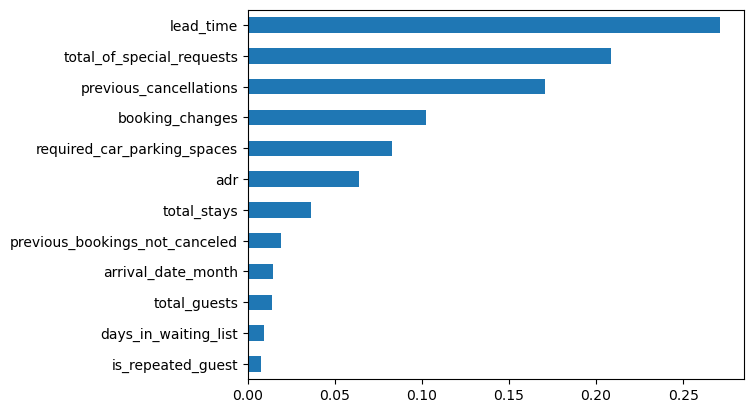

In [116]:
s1 = pd.Series(rf_clf_hyp.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [117]:
df.corr().tail(1)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_guests,arrival_month,month,total_child,long_lead_time
long_lead_time,0.211148,0.827737,0.000829,0.135545,0.131832,-0.003665,0.051767,0.113437,0.070248,-0.0355,-0.0164,-0.059767,0.102426,-0.040522,0.003044,0.141391,-0.092333,-0.07914,-0.081883,0.104857,0.034532,0.135545,0.051193,-0.038168,1.0


### AdaBoost 

In [119]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(learning_rate=0.5, random_state=20)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=20)

In [120]:
evaluation('Train Data Evaluation', adb_clf, x_train, y_train)
print('**'*20)
evaluation('Test Data Evaluation', adb_clf, x_test, y_test)

**************Train Data Evaluation***************
Accuracy Score : 0.7637155540665047
****************************************
Confusion Matrix: 
 [[51523  8610]
 [13958 21421]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     60133
           1       0.71      0.61      0.65     35379

    accuracy                           0.76     95512
   macro avg       0.75      0.73      0.74     95512
weighted avg       0.76      0.76      0.76     95512

****************************************
****************************************
***************Test Data Evaluation***************
Accuracy Score : 0.766060809112991
****************************************
Confusion Matrix: 
 [[12946  2087]
 [ 3499  5346]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82  

### Hyperparameter Tunning

In [121]:
adb_model=AdaBoostClassifier(random_state=20)

hyp_grid = {'n_estimators': np.arange(10,100,5),
           'learning_rate': np.arange(0.01, 2,0.05),
            'algorithm':['SAMME.R','SAMME']}

rscv_adb_model = RandomizedSearchCV(adb_model,hyp_grid, cv=5, n_iter=50)
rscv_adb_model.fit(x_train,y_train)
rscv_adb_model.best_estimator_

AdaBoostClassifier(learning_rate=0.81, n_estimators=80, random_state=20)

In [122]:
adb_clf = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.81, n_estimators=80, random_state=20)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.81, n_estimators=80,
                   random_state=20)

In [123]:
evaluation('Train Data Evaluation', adb_clf, x_train, y_train)
print('**'*20)
evaluation('Test Data Evaluation', adb_clf, x_test, y_test)

**************Train Data Evaluation***************
Accuracy Score : 0.7545858112069688
****************************************
Confusion Matrix: 
 [[51776  8357]
 [15083 20296]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.82     60133
           1       0.71      0.57      0.63     35379

    accuracy                           0.75     95512
   macro avg       0.74      0.72      0.72     95512
weighted avg       0.75      0.75      0.75     95512

****************************************
****************************************
***************Test Data Evaluation***************
Accuracy Score : 0.7557165591758104
****************************************
Confusion Matrix: 
 [[12997  2036]
 [ 3797  5048]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.82 

In [ ]:
# Here we can see that after hyperparameter tunning we got 75% accuracy on training data and 76% on testing data

In [ ]:
# suggestions:
# Below are the some ways we can use to get better accuracies
# Here we have applied multiple models like logistic regression,random forest ,adaboost and we got 77% accuracy on both 
# training and testing dataset
# We can improve the accuracy of model by performing hyperparameter tunning using GridSearchCV to get bets parameters
# We can also try some feature selection techniques like filter,wrapper,embedded method to improve the performance of model
# we should try some other models to improve the performace of model like we can try decision tree,XGboost,KNN,
# We can also go with ensemble learning methods
# We can also try to perform some better EDA and can create some more features which will help in improving performance of model

### Operational Insights and Recommendations

In [ ]:
# Increasing prices are associated with a higher rate of cancellations. To mitigate reservation cancellations, 
# hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts 
# to customers.

# The resort hotel experiences a higher ratio of cancellations compared to the city hotels. Therefore, hotels should consider
# offering competitive room price discounts on weekends and holidays.

# During the month of January, hotels can launch marketing campaigns with attractive offers to boost their revenue, 
# especially since cancellations tend to peak during this period.

# Enhancing the quality of hotels and their services can be an effective approach.

# Invest in marketing and improving services for less popular hotel types to increase their occupancy. Leverage the popularity 
# of certain hotel types by promoting their unique features.

# Adjust booking policies, such as non-refundable deposits for high-risk bookings (e.g., bookings with long lead times). 
# Offer flexible cancellation policies to low-risk bookings to attract more customers.

# Segment customers based on booking patterns, cancellation behavior, and other factors.
# Tailor marketing campaigns to different customer segments to improve engagement and conversion rates.